In [1]:
from queryClass.fetchSalesGraph_QueryHandling import FetchSalesGraphQueryHandling
from queryClass.browse_QueryHandling import BrowseQueryHandling

In [2]:
browse = BrowseQueryHandling()

""" 
We can filter our search to get more specific results, here we are searching for adidas-yeezy-boost-350 with special parameters. 

The search function takes in the following parameters:  

    - search: the search term
    - limit: the number of products to be returned
    - gender: men
    - years: the years of the products to be returned
    - sortID: the sorting method of the browse page (JSON\response\browseSort.json)
"""
browse.setSearch("adidas-yeezy-boost-350", 100 , gender = "men", years = ["2021","2022"], sortID = "featured")

""" get the main info from the browse query in panda dataframe """
df = browse.getInfo_DF()
df.to_csv('./INFO_BROWSE/adidas-yeezy-boost-350_100.csv')

print(df)

Browse query, status code : 200
                                      ID  \
0   e4b11157-0d0f-4fec-aa15-6e51603307ba   
1   bd0ab2c1-1775-4b39-996a-1c40309251a2   
2   9ee080b0-305d-4846-a5af-acf438aaad7a   
3   5ac95a71-58c4-4495-adfa-0739f5f6c3c0   
4   6e3fd470-961c-4dec-8c6c-c31bf92b3d9c   
5   9e2685be-53b7-4a60-94d3-21d5e0776b59   
6   5170cc25-6fcb-4983-8665-8c1b41e72709   
7   32d2aac9-0bac-4862-85c0-1dcbd7d2d03f   
8   469a4104-d19b-43c5-980b-d6bed2c04ffe   
9   c3eb0813-b448-4212-b813-da40a959b492   
10  8a3ace01-73ae-4b0b-914b-ed69915d4ac6   
11  2213f21b-cf6e-4a0a-9613-95c5ddd8869f   
12  e9059a95-e55d-4886-a592-06ab1581f3f6   
13  8c14c656-a1f7-43af-9a87-d35c4561ffb5   
14  c61f91f2-d81b-4d0a-ad63-b1c38a6e1344   
15  92446595-6762-47f5-a3a7-ee0f470a3633   
16  d18eed1d-94cf-4f0f-9d1a-1571554b1e32   
17  8f9585d3-9b81-4ab8-9380-062ad90e247f   

                                             URL Key retail Price  \
0                     adidas-yeezy-boost-350-v2-bone          

In [3]:
idMaxSold = df['sold'].idxmax() #sold represent the number of total sales
row_with_highest_sold = df.loc[idMaxSold]
print(row_with_highest_sold['URL Key'] + 'has ' + str(row_with_highest_sold['sold']) + ' sales on stockX')


adidas-yeezy-boost-350-v2-onyxhas 25710 sales on stockX


In [4]:
""" List the number of shoe sold for specific sizes """ 

checkVariantId = idMaxSold
total_sold = []
for key in ['9', '9.5', '10', '10.5']:
    browse.setSearch(df.iloc[idMaxSold]['URL Key'], 1, shoeSize= [key])
    browse.setResponse()
    total_sold.append(browse.getResponse()['data']['browse']['results']['edges'][0]['node']['market']['deadStock']['sold'])
    print("size " + str(key) + ", total sold : " + str(total_sold[-1]))

print("total sold for the 3 size : " + str(sum(total_sold)))



Browse query, status code : 200
size 9, total sold : 2176
Browse query, status code : 200
size 9.5, total sold : 2648
Browse query, status code : 200
size 10, total sold : 2925
Browse query, status code : 200
size 10.5, total sold : 2465
total sold for the 3 size : 10214


FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
Number of points fetched : 2175
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
Number of points fetched : 2646
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
Number of points fetched : 2928
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
Nu

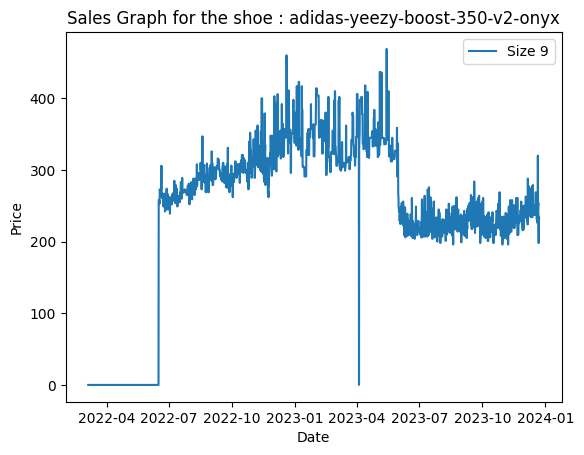

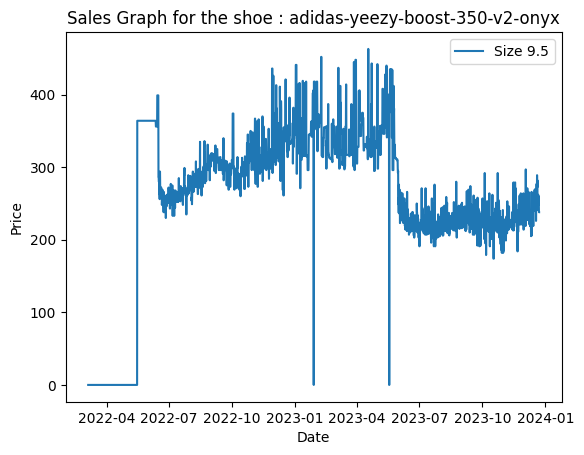

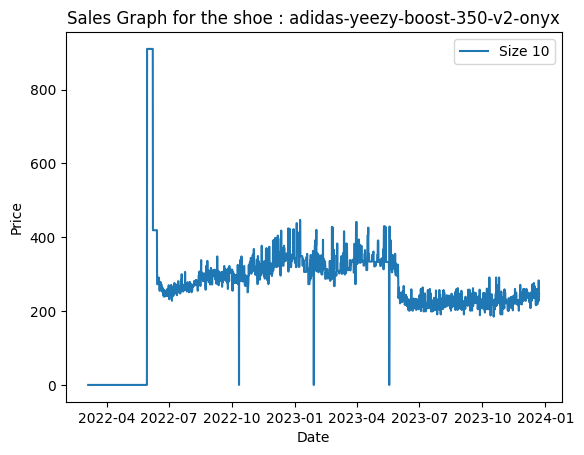

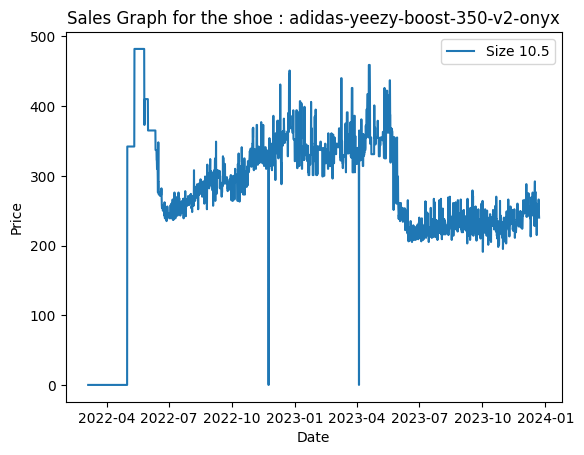

In [5]:
import matplotlib.pyplot as plt
from numpy import size

sizes = ['9', '9.5', '10', '10.5']

for i in range(len(sizes)) :

    productId = df['Variants'][idMaxSold][sizes[i]]    
    sales = FetchSalesGraphQueryHandling(productId, isVariant = True)
    
    """ Number of sales to be returned and the release date"""
    intervals = total_sold[i]
    releaseDate = df.iloc[idMaxSold]["release Date"]

    """ get the data (time series) from the query as a panda dataframe"""
    data= sales.fetchSalesGraph(intervals, releaseDate ,currencyCode = "EUR")

    data.to_csv('./SALES/' + df.iloc[idMaxSold]['URL Key'] + '_size' + sizes[i] + '.csv')

    plt.figure()
    plt.plot(data.index, data['Price'], label=f"Size {sizes[i]}")

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Sales Graph for the shoe : ' + df.iloc[idMaxSold]['URL Key'])
    plt.legend()
plt.show()


FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
Number of points fetched : 2175
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
Number of points fetched : 2646
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
Number of points fetched : 2928
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
FetchSalesGraph query, status code : 200
Nu

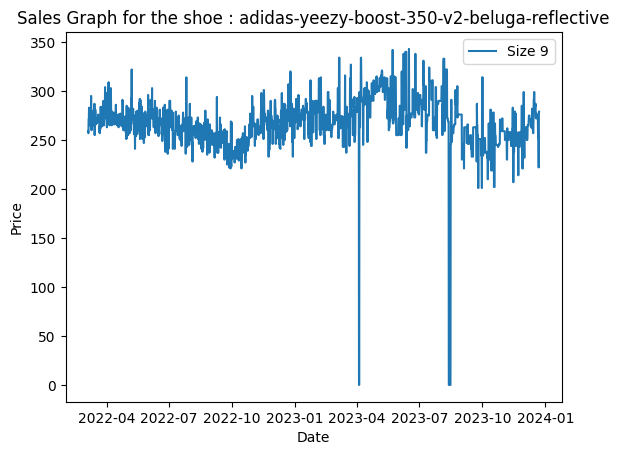

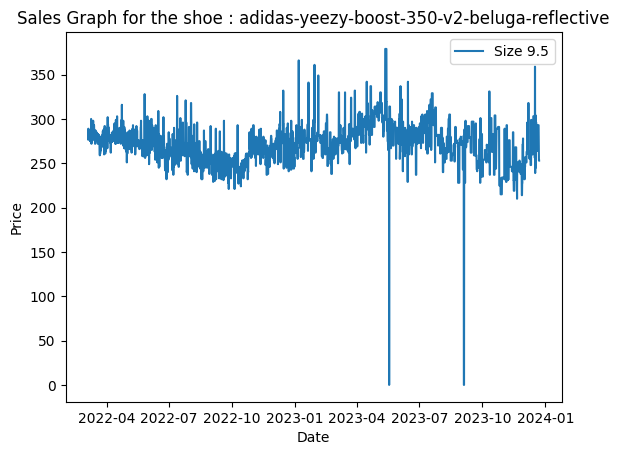

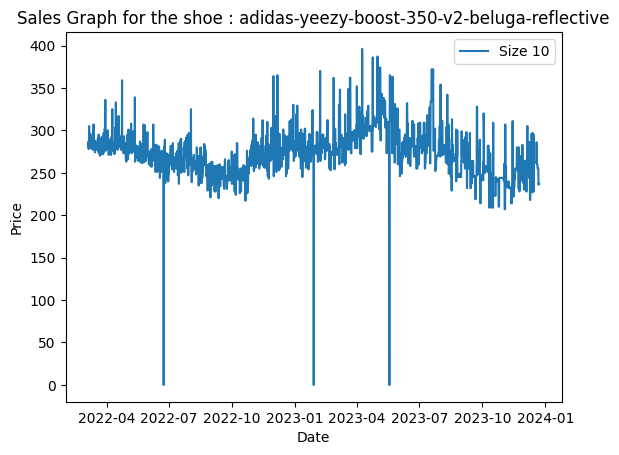

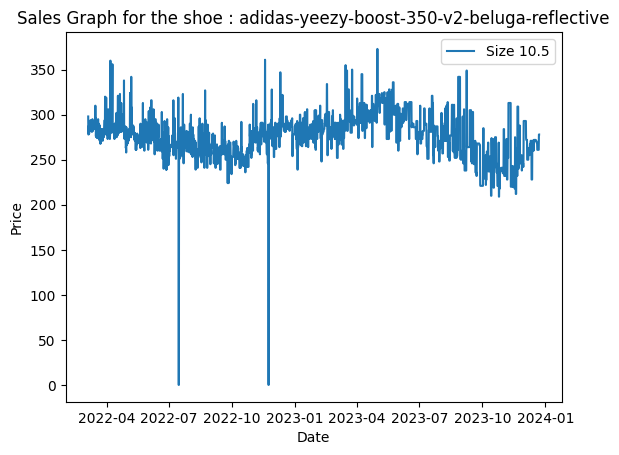

In [6]:

""" Same process but for another shoe (id = 2) """

sizes = ['9', '9.5', '10', '10.5']

for i in range(len(sizes)) :

    productId = df['Variants'][2][sizes[i]]    
    sales = FetchSalesGraphQueryHandling(productId, isVariant = True)
    
    """ Number of sales to be returned and the release date"""
    intervals = total_sold[i]
    releaseDate = df.iloc[idMaxSold]["release Date"]

    """ get the data (time series) from the query as a panda dataframe"""
    data= sales.fetchSalesGraph(intervals, releaseDate ,currencyCode = "EUR")
    data.to_csv('./SALES/' + df.iloc[2]['URL Key'] + '_size' + sizes[i] + '.csv')


    plt.figure()
    plt.plot(data.index, data['Price'], label=f"Size {sizes[i]}")

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Sales Graph for the shoe : ' + df.iloc[2]['URL Key'])
    plt.legend()
plt.show()